# Simulacion del grado de propagacion de la Covid-19 Ecuador

Para realizar esta  simulacion se utilizar la libreria pygame para ello se debe instalar pygame

conda install -c cogsci pygame.


## Introduccion

En una epidemia, el parámetro fundamental, del que todo depende, es R0. Este símbolo se refiere al número de personas que, mede cada infectado contagia antes de convertirse en inofensivo ( bien porque está en aislamiento, hospitalizado o ha muerto).

El valor R0 es fundamental, porque si es grande, el contagio se alarga más rápidamente. Si R0 es 2, y si el tiempo medio en el que se permanece contagiados es una semana, y hay 1.000 infectados, entonces después de una semana los infectados será 3.000 (los 1.000 del inicio más 2.000 nuevos contagiados). 

Si R0 es 5, después de una semana los infectados será 6.000 (los 1.000 de partida más 5.000 nuevos contagiados). A este punto, el ciclo vuelve a partir, con más o menos retraso, dependiendo de cuánto tiempo un nuevo infectado emplea en convertirse a sí mismo en contagioso.

Se reconstruye la dinámica de transmisión de una enfermedad inventada con cuatro escenarios diversos: 
- 1. Sin ninguna medida de contención; 
- 2. Con la cuarentena absoluta, aunque se «escapa» algún infectado; 
- 3. Con formas de aislamiento y la distancia de seguridad entre personas que permiten salir solo a un ciudadano de cada cuatro; 
- 4. Si sale solamente un ciudadano de cada ocho. En definitiva, solo con el aislamiento se puede contener la epidemia y lograr que la respuesta sanitaria sea eficaz. https://www.washingtonpost.com/graphics/2020/world/corona-simulator/

Entonces, el número reproductivo (R0): Este valor representa el número promedio de personas que un individuo infectado puede contagiar. Para el COVID-19, se estima que se encuentra entre 1.4 y 4 (Qun Li, 2020). Ademas segun  estimaciones de la OMS la probabilidad de fallecimiento es de 1.2% - 4.2%  segun https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30243-7/fulltext




In [ ]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 4.0  # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

pygame 2.0.0 (SDL 2.0.12, python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Practica
En concecuencia, generar 5 simulaciones: 
1. R0 Investigar el valor de varianza de R0 dentro del Ecuador
2. El valor 4, el cual representaría el peor de los casos. 
4. El valor 1.4 en el mejor de los casos
5. Revisar y Investigar algun tipo de software que permita simular la taza de contagio en una epidemia .Aplicar los datos del Ecuador y obtener un R0

Puntos extras: Plantee y realize mejoras al modelo de simulacion.


## 1. R0 Investigar el valor de varianza de R0 dentro del Ecuador


La cifra de infectados aumenta cada día por el momento hay 60.465.801 humanos contagiados en todo el mundo y 1.422.510 fallecidos por este nuevo virus que se ha expandido rápidamente por los países. Además se tiene el registro que 38.758.789 personas se han recuperado.
Ecuador

164.009 pacientes recuperados.

23.021 casos con alta hospitalaria.

8.891 personas fallecidas (confirmados COVID-19)

473 hospitalizados estables.

344 hospitalizados con pronóstico reservado.

400.621 casos fueron descartados.
## 2. El valor 4, el cual representaría el peor de los casos. 

In [ ]:
#Parametros de inicio
PROBA_MUERTE = 4.2  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 4.00  # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

## 4. El valor 1.4 en el mejor de los casos

In [ ]:
from random import randrange  # Obtener un numero randomico
import pygame

# Parametros de inicio
PROBA_MUERTE =4.2  # Probabilidad de que la gente muera COVID
CONTAGION_RATE =   1.04 # factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0  # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50  # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50  # Numero de filas
nb_cols = 50  # Numero de columnas

global display, myfont, states, states_temp  # Declaracion de variables globales

# Declaro colores en formato RGB
WHITE = (255, 255, 255)
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)


# Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    # Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2]  # Nuevos contagiados


# Genero las personas que cuentan con inmunidad o vacuna
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1


# Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador += 1
    return contador


# Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10  # Estado inicial de la simulacion Posicion del Infectado
it = 0  # Variable para contar las Iteraciones
total_muerte = 0  # Contabiliza el numero de muertos
vacunar()  # Llamar a la funcion vacunar

pygame.init()  # Incializo el motor de juegos pygame
pygame.font.init()  # Inicializo el tipo de letra
display = pygame.display.set_mode((800, 750), 0, 32)  # Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")  # Titulo
font = pygame.font.SysFont('Calibri', 40)  # Tipo de letra
display.fill(WHITE)  # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED)  # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy()  # Copia de la matriz
        # Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10:  # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE:  # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1  # Muere
                    else:
                        states_temp[x][y] = 1  # Cura o recupera
                if state >= 10 and state <= 20:  # Rango de infectado
                    if randrange(99) < PROBA_INFECT:  # Infecto a las personas cercanas entre  10 y 20
                        neighbour = get_vecinos(x, y)  # Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0:  # Verifico que este sano
                            states_temp[x2][y2] = 10  # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes()  # contar el numero de muertos

    pygame.draw.rect(display, WHITE, (250, 30, 260, 50))  # Grafico el fondo
    textsurface = font.render("Total muertes: " + str(total_muerte), False, (255, 160, 122))  # El numero de muertos
    display.blit(textsurface, (250, 30))  # Graficar el texto de muertes
    # Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE  # No infectado
            if states[x][y] == 1:
                color = GREEN  # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50)  # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK  # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    # Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE:  # Presiona y Escape
            pygame.quit()  # Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:  # Presiona y espacio
            # Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar()  # Llamar a la funcion vacunar

    pygame.display.update()  # Mandar actualizar la ventana

## 5. Revisar y Investigar algun tipo de software que permita simular la taza de contagio en una epidemia .Aplicar los datos del Ecuador y obtener un R0


es sofware que se uso es Snap! que  es un lenguaje de programación ampliamente atractivo para niños y adultos que también es una plataforma para el estudio serio de la informática.en la sigiente foto se muestrn el codigo y la simulacion:
codigo:
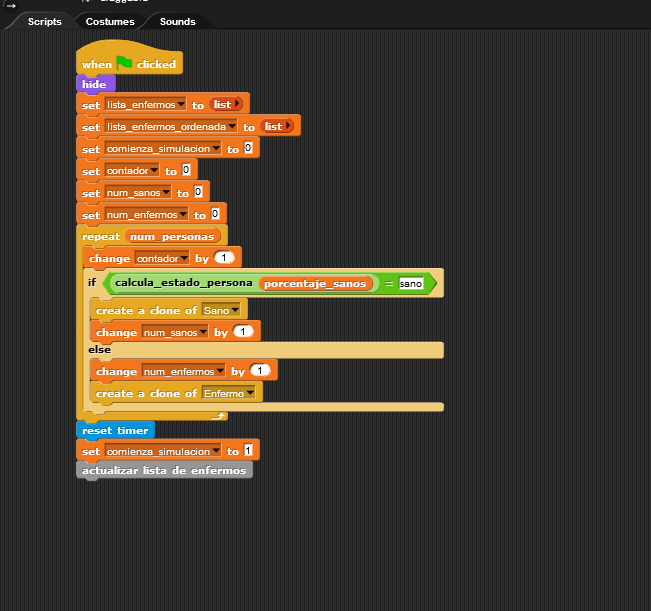
simulacion:
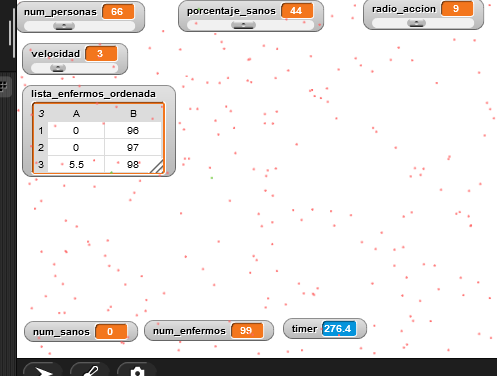

link Programa:
1-https://snap.berkeley.edu/snap/snap.html#present:Username=juandalibaba&ProjectName=virus%20-%20modelo%20-%200&editMode&noRun

# Analisis
Se puede constatar que en cada  simulación, y gráfica, cambia y varian los datos esto debido a las valor de R0, ya que si se da un valor de R0 bastante bajo, esto nos opermite un analisis mas detallado de el avace de la enfermedad pediante la variacion de R0 .
# Conclusiones

Mediante el desarollo de los sigientes ejercicios nos a aydado a obtener un número promedio de casos nuevos y ademad de predesir cual sera el abanse de esta enfermedad, a lo largo de un período en resumen nos ayuda a pronosticar la cantidad de personas que se infectan en promedio a partir de una persona enferma.
# Opinion

Estos metodos de simulasion son muy utiles para poder saber como abansa el covid ademas de aydarnos a saber que medidas nos puede ayadar a prevener mas contajios por covid

# Referencias
- http://code.intef.es/simulamos-una-epidemia-virica/
- 